# Comparing the Kinematic Model to Real World cases
@author: Max Felius

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re, datetime
import os, sys, time

# personal package for sinkhole comparison
sys.path.extend(os.path.join(os.getcwd(),'package'))
from package.zg import zg
from package.inverse_kinematic_model import inverse_kinematic_model
from package.center_determination import center_determination
from package.sinkhole_data_loader import sinkhole_data_loader

#folders. edit sinkhole_data_loader when adding new folders
folders = [
    'Baer2018_1',
    'Baer2018_2',
    'Baer2018_3',
    'Nof2013',
    'Nof2019',
    'Wink2016',
    'Wink2019'
]
dsinkhole = sinkhole_data_loader(folders)

In [2]:
#extract and combine x and z coordinates and define t
# This is a test example
data_list = dsinkhole['Wink2016']['data_list']
delta_days = dsinkhole['Wink2016']['delta_days']

x = np.array([])
y = np.array([])
t = np.array([])
nitems = 0
for idx,item in enumerate(data_list):
    nitems += 1
    n = len(item)
    t = np.concatenate((t,[delta_days[idx]]*n))
    x = np.concatenate((x,item[0].values))
    y = np.concatenate((y,item[1].values))

#from cm to meter
y = y/100
# y_data = data_list[i][1].values/100

#center determination based on the RMSE
x_data_list = data_list[0][0].values
x0_array = np.linspace(x_data_list[10],x_data_list[-10],100)

center = center_determination(t,x,y,x0_array,data_list,delta_days,nitems,1000,470)
    
#define r
x0 = x0_array[np.where(min(center)==center)[0]]
r = np.sqrt((x-x0)**2)

Determining Center Position:  68%|██████▊   | 68/100 [00:06<00:05,  5.64it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00017354487840409635 and R=2175.6848396892638.


Determining Center Position:  69%|██████▉   | 69/100 [00:06<00:08,  3.82it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00017063575799162317 and R=2607.1739492309034.


Determining Center Position:  71%|███████   | 71/100 [00:07<00:08,  3.26it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.0001682820140064263 and R=3206.09568412662.


Determining Center Position:  72%|███████▏  | 72/100 [00:07<00:09,  2.97it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00016726676475439144 and R=3614.0294880044107.


Determining Center Position:  74%|███████▍  | 74/100 [00:08<00:11,  2.29it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00016548974302476438 and R=-4894.100140909824.


Determining Center Position:  75%|███████▌  | 75/100 [00:09<00:10,  2.29it/s]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/5.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/package/inverse_kinematic_model.py:59: RuntimeWarning: overflow encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:
/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/5.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/package/inverse_kinematic_model.py:45: RuntimeWarning: overflow encountered in double_scalars
  A2 = ((2*v*t*np.pi*r**2)/(R**3))*zg(R,r)
Determining Center Position:  76%|███████▌  | 76/100 [00:09<00:08,  2.90it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00016470615126157123 and R=-6073.325279631071.


Determining Center Position:  78%|███████▊  | 78/100 [00:10<00:07,  2.96it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.0001633057394702603 and R=20924.054209292317.


Determining Center Position:  94%|█████████▍| 94/100 [00:11<00:00, 11.83it/s]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/5.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/package/inverse_kinematic_model.py:50: RuntimeWarning: invalid value encountered in matmul
  dx = Qxhat @ J.T @ invQyy @ dy
Determining Center Position:  96%|█████████▌| 96/100 [00:11<00:00,  8.23it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.


Determining Center Position: 100%|██████████| 100/100 [00:12<00:00,  7.89it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.


In [3]:
#Gaussian Parameters
v_in = 1
R_in = 470

gv, gR = inverse_kinematic_model(v_in,t,R_in,r,y,verbose='On')

Stopped at iteration 21.
The computed values are v=-0.00031597073004308967 and R=557.5030883088658.
The total runtime was: 0.07345294952392578 seconds.


Gaussian Average Fit Percentage: 73.80%.
Gaussian Average RMSE: 2.73 mm.


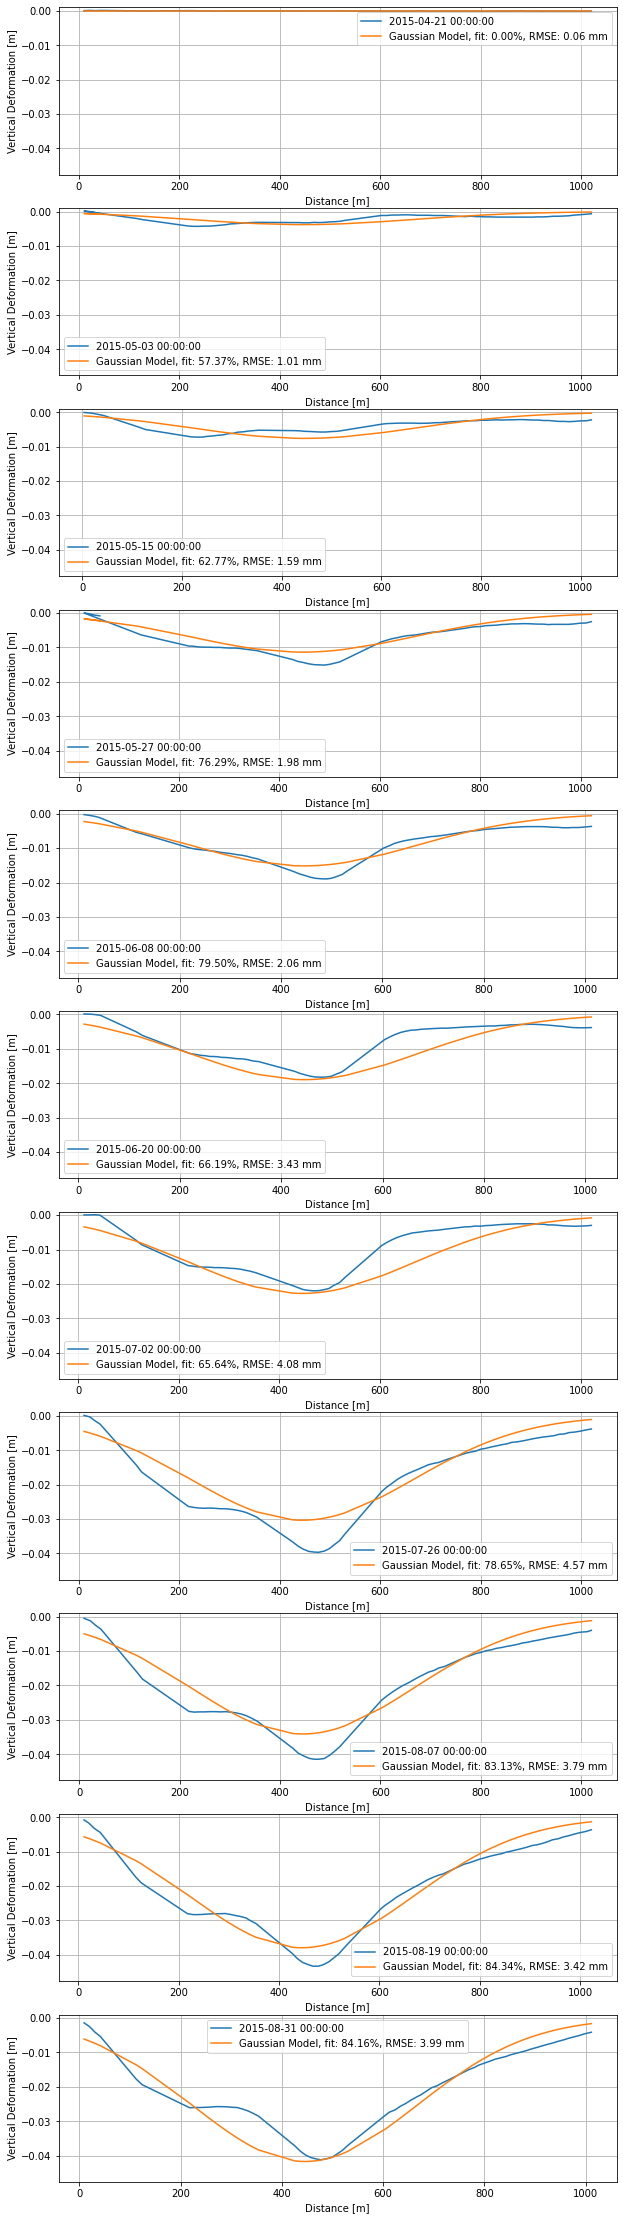

In [4]:
#plot the results

# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(nrows=nitems, figsize = (10,40))
zmin = min(data_list[-2][1]/100)
fit_list = np.zeros((3,nitems))
RMSE_list = np.zeros((3,nitems))

for i in range(nitems):
    #compute some parameters
    y_data = data_list[i][1].values/100 #from cm to meter
    x1 = data_list[i][0].values
    r1 = np.sqrt((x1-x0)**2)
    
    #computing the gaussian model and fit
    y1 = gv*delta_days[i]*zg(gR,r1)
    ehat = y_data - y1
    gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[0,i] = gfit
    gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[0,i] = gaus_RMSE
    
    #plotting the data
    ax[i].plot(x1,y_data,label=dsinkhole['Wink2016']['date_list'][i])

    #plotting the gaussian model
    ax[i].plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE))  
    
    #Notations
    ax[i].grid(True)
    ax[i].set_xlabel('Distance [m]')
    ax[i].set_ylabel('Vertical Deformation [m]')
    ax[i].set_ylim(zmin*1.1,0.001)
#     ax[i].set_title('Model fit: {:.4f}'.format(fit))
    ax[i].legend()

#skip the first fit percentage
avg_gfit = np.sum(fit_list[0,1:])/(nitems-1)
avg_gRMSE = np.sum(RMSE_list[0,:])/(nitems)

print('Gaussian Average Fit Percentage: {:.2f}%.'.format(avg_gfit))
print('Gaussian Average RMSE: {:.2f} mm.'.format(avg_gRMSE))

## Table with Error Metrics

Next, a table will be generated containing the error metrics of the linear Gaussian influence function fitted to real world cases.

In [5]:
sinkhole_error_metrics = pd.DataFrame(np.zeros((2,len(folders))),columns=folders)

for folder in folders:
    # creating the new datasets
    data_list = dsinkhole[folder]['data_list']
    delta_days = dsinkhole[folder]['delta_days']
    init_values = dsinkhole[folder]['Initial Values']
    
    #Gaussian Parameters
    v_in = init_values['v_init']
    R_in = init_values['R_init']
    
    x = np.array([])
    y = np.array([])
    t = np.array([])
    nitems = 0
    for idx,item in enumerate(data_list):
        nitems += 1
        n = len(item)
        t = np.concatenate((t,[delta_days[idx]]*n))
        x = np.concatenate((x,item[0].values))
        y = np.concatenate((y,item[1].values))

    #from cm to meter
    y = y/100
    # y_data = data_list[i][1].values/100

    #center determination based on the RMSE
    x_data_list = data_list[0][0].values
#     print(len(x_data_list))
    x0_expected = init_values['Expected_X0']
    
    max_distance = np.max(x_data_list) - np.min(x_data_list)
    
    x0_array = np.linspace(x0_expected-max_distance/2,x0_expected+max_distance/2,300)
    
#     x0_array = np.linspace(x_data_list[0],x_data_list[-1],300)
    
    center = center_determination(t,x,y,x0_array,data_list,delta_days,nitems,v_in,R_in,verbose='off')
    
    #define r 
    x0 = x0_array[np.where(min(center)==center)[0]]
        
    if len(x0) > 1:
        idx_len = len(x0)
        x0 = x0[int(idx_len/2)]
    r = np.sqrt((x-x0)**2)

    #determining the parameters
    try:
        gv, gR = inverse_kinematic_model(v_in,t,R_in,r,y,verbose='off')
    except:
        gv = 0
        gR = 1
        
    fit_list = np.zeros((1,nitems))
    RMSE_list = np.zeros((1,nitems))

    for i in range(nitems):
        #compute some parameters
        y_data = data_list[i][1].values/100 #from cm to meter
        x1 = data_list[i][0].values
        r1 = np.sqrt((x1-x0)**2)

        #computing the gaussian model and fit
        y1 = gv*delta_days[i]*zg(gR,r1)
        ehat = y_data - y1
        gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
        fit_list[0,i] = gfit
        gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
        RMSE_list[0,i] = gaus_RMSE

        #plotting the data
#         ax[i].plot(x1,y_data,label=date_list[i])

        #plotting the gaussian model
#         ax[i].plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE))  

#         #Notations
#         ax[i].grid(True)
#         ax[i].set_xlabel('Distance [m]')
#         ax[i].set_ylabel('Vertical Deformation [m]')
#         ax[i].set_ylim(zmin*1.1,0.001)
#     #     ax[i].set_title('Model fit: {:.4f}'.format(fit))
#         ax[i].legend()

    #skip the first fit percentage
    avg_gfit = np.sum(fit_list[0,1:])/(nitems-1)
    avg_gRMSE = np.sum(RMSE_list[0,:])/(nitems)
    
    sinkhole_error_metrics[folder].iloc[0] = avg_gfit
    sinkhole_error_metrics[folder].iloc[1] = avg_gRMSE    

Ended using the maximum number of iterations: 100.
The computed values are v=0.0006820023885178822 and R=1461.964086788454.


/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/5.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/package/inverse_kinematic_model.py:50: RuntimeWarning: invalid value encountered in matmul
  dx = Qxhat @ J.T @ invQyy @ dy


Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.


/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/5.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/package/inverse_kinematic_model.py:59: RuntimeWarning: overflow encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:


Ended using the maximum number of iterations: 100.
The computed values are v=0.0006816609735543036 and R=1432.2422522208458.


/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/5.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/package/inverse_kinematic_model.py:45: RuntimeWarning: overflow encountered in double_scalars
  A2 = ((2*v*t*np.pi*r**2)/(R**3))*zg(R,r)


Ended using the maximum number of iterations: 100.
The computed values are v=0.0006814039664446731 and R=1402.182340957029.
Ended using the maximum number of iterations: 100.
The computed values are v=0.0006813538962351058 and R=-1394.613094271163.
Ended using the maximum number of iterations: 100.
The computed values are v=0.0006813097858532164 and R=-1387.021736467425.
Ended using the maximum number of iterations: 100.
The computed values are v=0.0006812717874906129 and R=-1379.4080587996853.
Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.
Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.
Ended using the maximum number of iterations: 100.
The computed values are v=0.0006999740651108521 and R=888.924451979061.
Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.
Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.
Ended usi

In [6]:
sinkhole_error_metrics

,Baer2018_1,Baer2018_2,Baer2018_3,Nof2013,Nof2019,Wink2016,Wink2019
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
